<a href="https://colab.research.google.com/github/Jiayi1827/STAT-430/blob/main/STAT430_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** *Find multiple time series data that can be used for clustering. It could be from real data, existing package, or even simulated. It should have more than 10 different time series data. The length of the data does not have to match exactly, but in that case you may need to use dynamic time warping or other methods to deal with them.*

  *Create visual aids (plots) to show your data.*


Dataset source: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

This is a retail dataset of a global superstore for 4 years.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')


In [21]:
data=pd.read_csv('/content/drive/MyDrive/STAT 430 Time Series/HW5/train.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [22]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [23]:
data['Sub-Category'].unique().shape


(17,)

In [24]:
# Convert the 'Order Date' to datetime format and aggregating sales by date and product category
data['Order Date'] = pd.to_datetime(data['Order Date'])
time_series_data = data.groupby(['Order Date', 'Sub-Category']).agg({'Sales': 'sum'}).reset_index()

# Pivot the table to get time series data for each category
time_series_pivot = time_series_data.pivot(index='Order Date', columns='Sub-Category', values='Sales').fillna(0)

# Resample the data to monthly frequency for a clearer time series analysis
monthly_time_series = time_series_pivot.resample('M').sum()

# Display the first few rows of the processed time series data
monthly_time_series.head()


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order Date,,,,,,,,,,,,,,,,,
2015-01-31,1622.590,2554.330,578.718,470.174,1010.055,9461.292,659.988,194.360,36.750,831.462,169.424,0.000,641.596,6117.902,3770.104,0.000,709.509
2015-02-28,2134.130,293.250,183.258,2000.504,883.920,239.840,479.984,24.128,17.022,615.570,57.456,559.710,403.104,2871.764,1570.864,253.980,0.000
2015-03-31,677.262,358.802,277.354,1602.860,1706.446,3672.855,0.000,371.600,38.352,850.384,214.478,25314.658,1221.662,6757.592,2772.862,400.284,7790.241
2015-04-30,1151.146,1733.302,443.508,1017.630,353.568,3935.958,0.000,397.192,56.460,818.236,104.866,4727.916,1139.818,3546.468,3564.530,0.000,1719.418
2015-05-31,1997.534,1220.520,1487.398,4336.712,290.666,2956.439,719.976,404.552,22.104,1197.952,14.620,0.000,854.904,4877.690,3505.708,4221.910,1411.805


In [25]:
len(monthly_time_series)

48

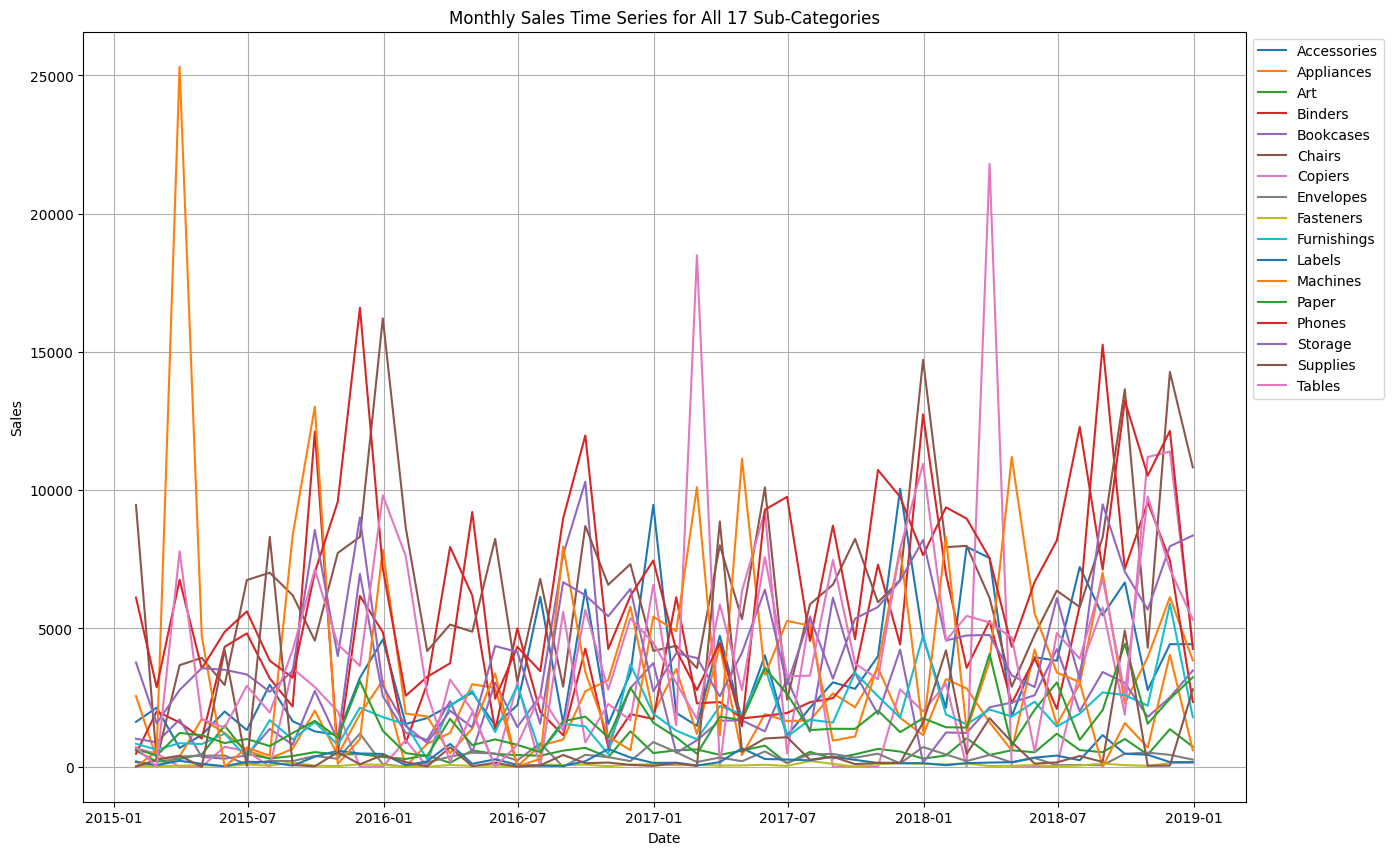

In [26]:
plt.figure(figsize=(15, 10))
for sub_category in monthly_time_series.columns:
    plt.plot(monthly_time_series[sub_category], label=sub_category)

plt.title('Monthly Sales Time Series for All 17 Sub-Categories')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moving the legend outside the plot
plt.grid(True)
plt.show()



**Data description:** There are 17 different time series data with 48 time stamps in total. Each time series represent the sales data of one sub-category.

**2.** *Using K-means clustering method, cluster your data. Use different Ks and display a plot of dissimilarity (or inertia) vs K. Based on the plot, you may choose your K.*

In [27]:
# Transpose the DataFrame so that each row represents a sub-category and each column represents a month (one time observation)
transposed_data = monthly_time_series.T

# Initialize
scaler = MinMaxScaler()

# Fit and transform the transposed data
scaled_data_subcat = scaler.fit_transform(transposed_data)

# Back to dataframe
scaled_data_subcat = pd.DataFrame(scaled_data_subcat)


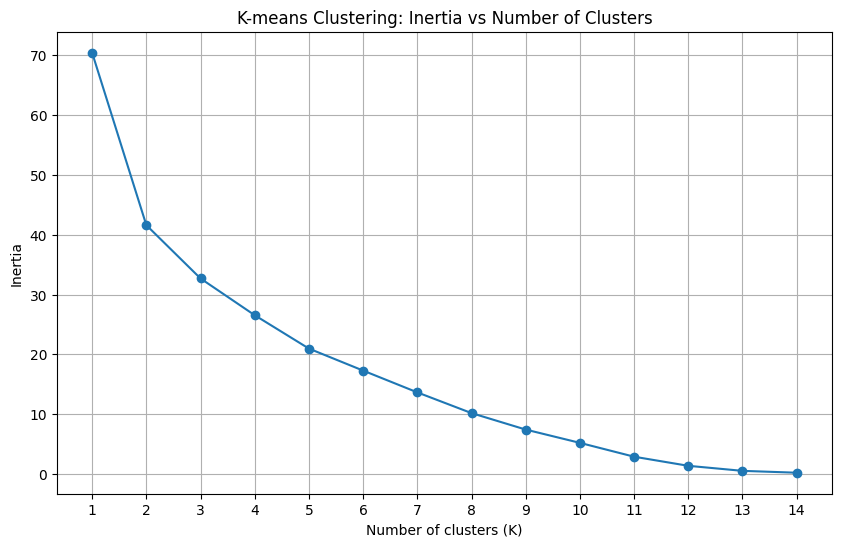

In [28]:

inertia = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data_subcat)
    inertia.append(kmeans.inertia_)

# Plotting Inertia vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('K-means Clustering: Inertia vs Number of Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()


**Analysis:** The most dramatic elbow is K=2, so 2 clusters is suggested by the elbow plot.

**K=2**

Based on the elbow plot and Hierarchical Clustering Dendrogram (ward linkage) from part 3, K=2 is used for K-means.

In [30]:
cluster_count = 2

kmeans = KMeans(n_clusters=cluster_count, random_state=0)
labels = kmeans.fit_predict(scaled_data_subcat)
labels

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

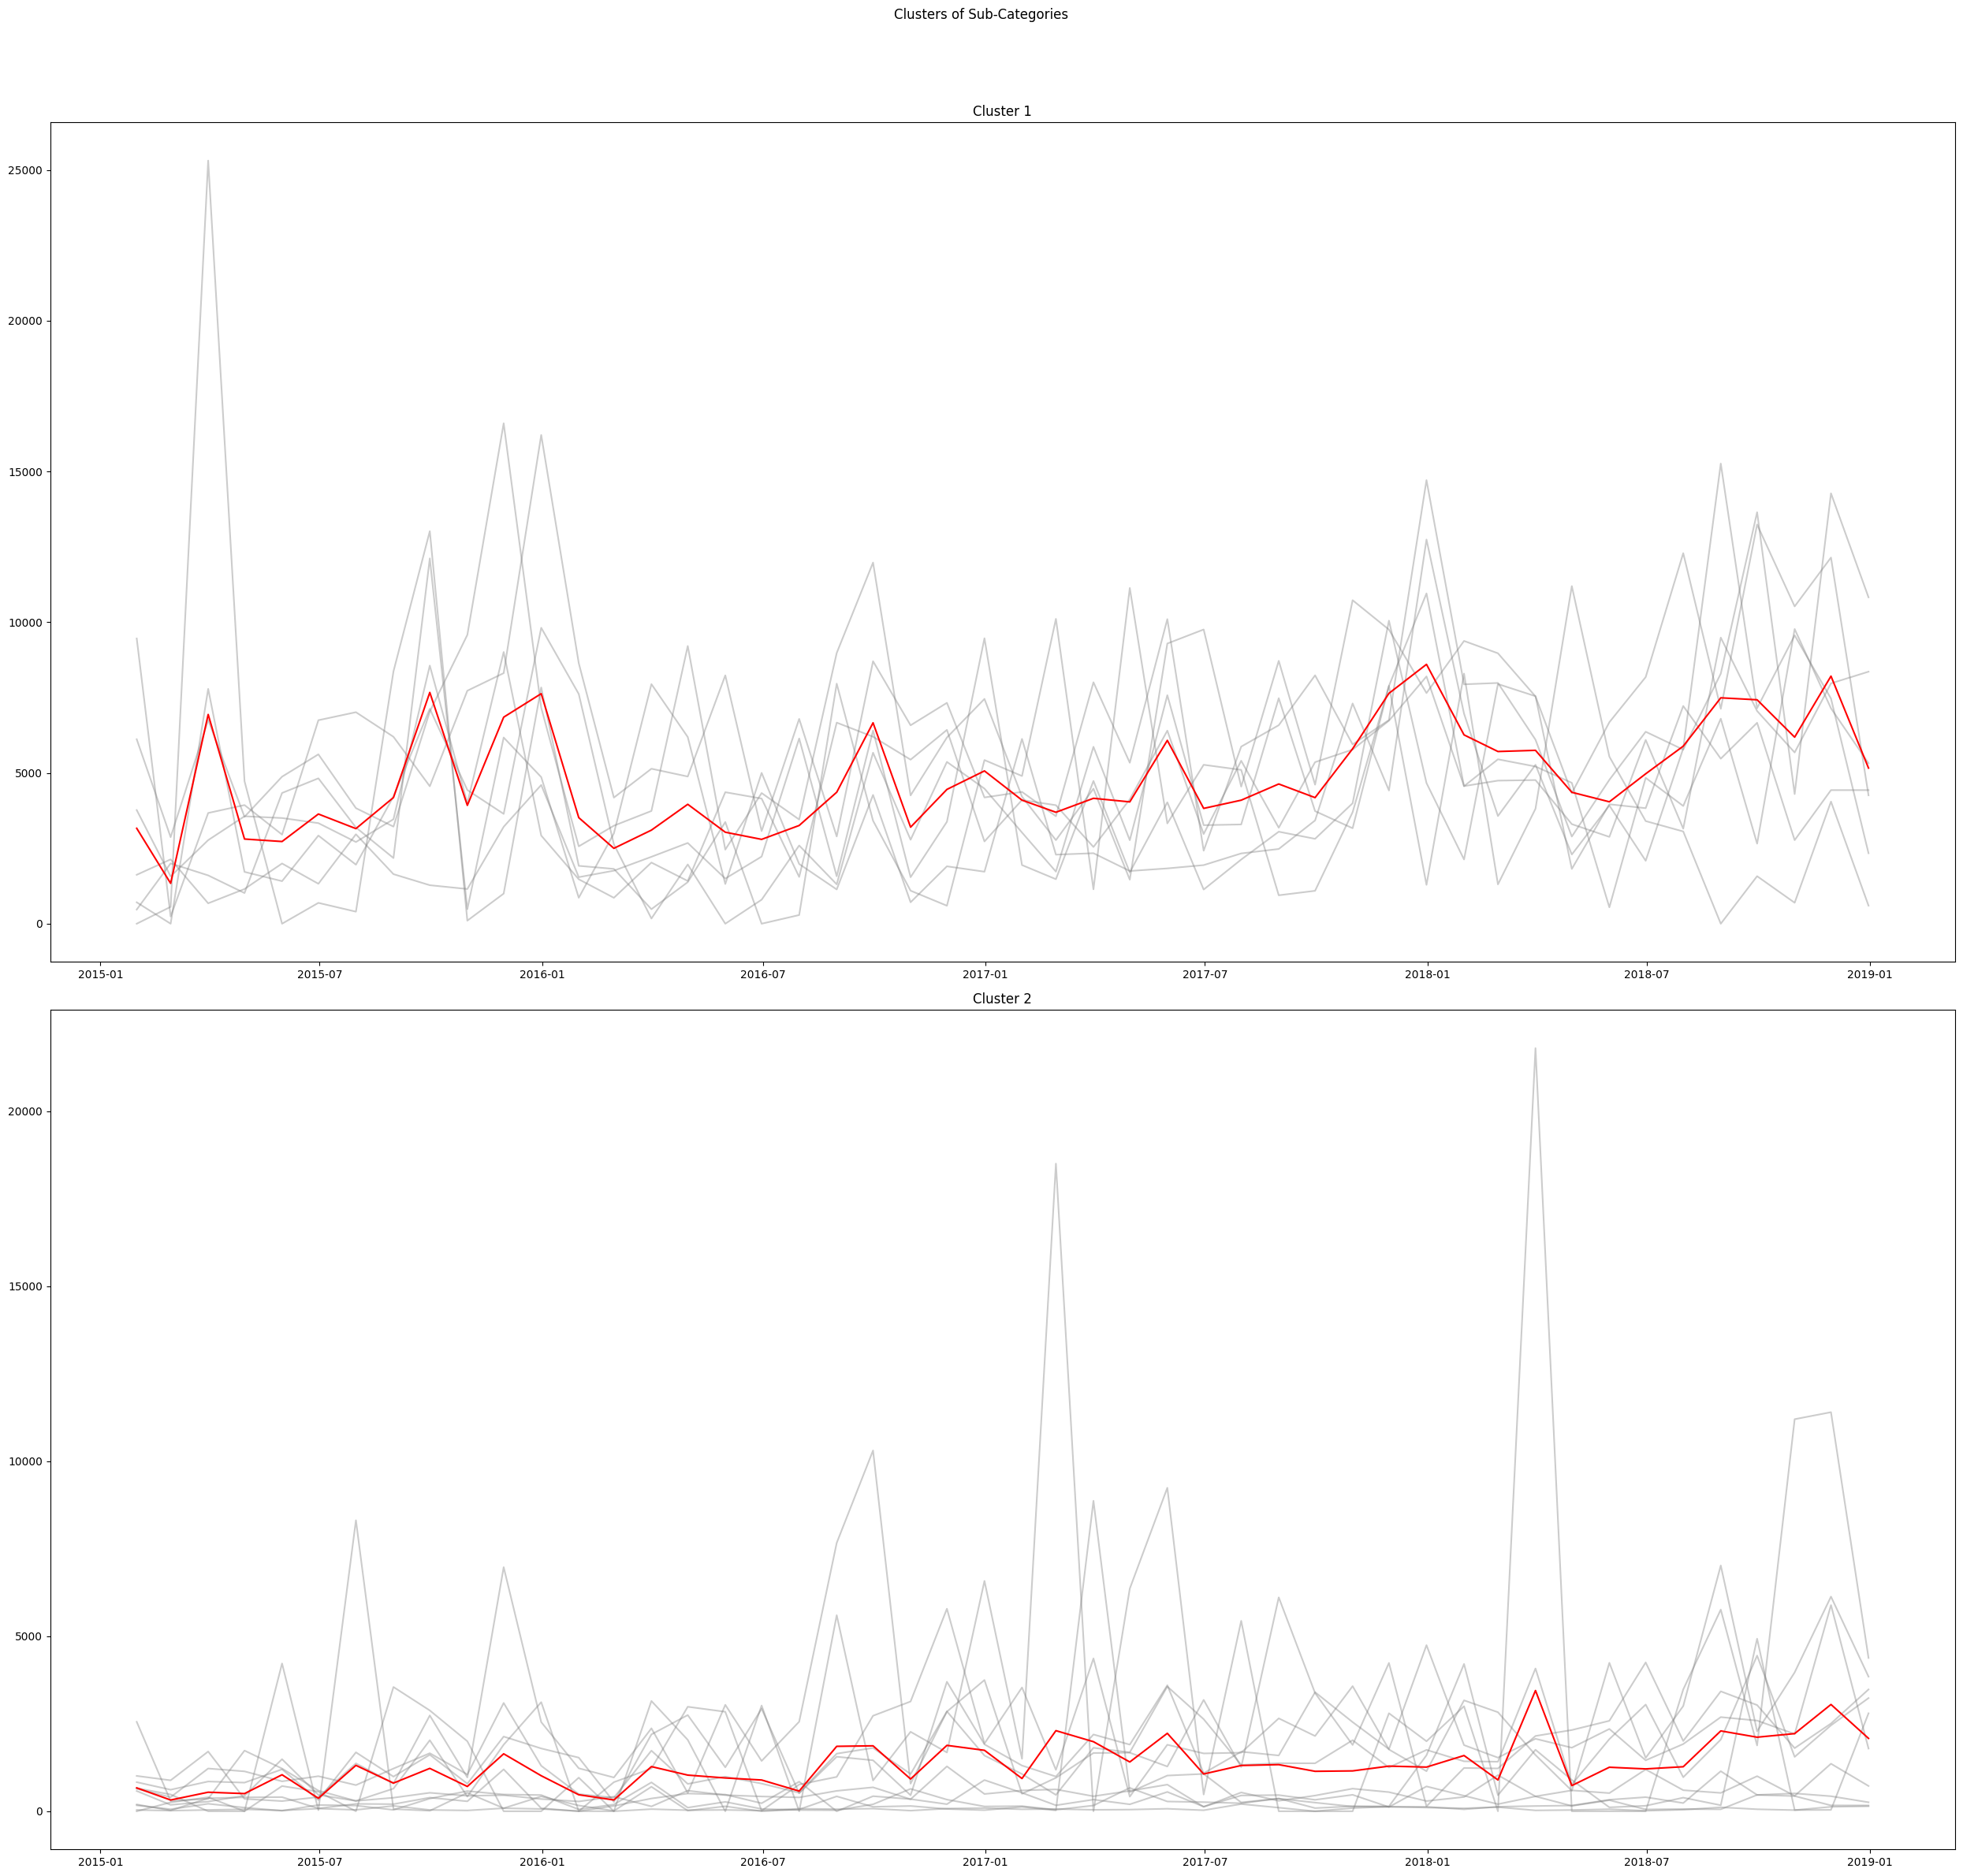

In [31]:
# Create subplots - one for each cluster
fig, axs = plt.subplots(cluster_count, 1, figsize=(25, 25))
fig.suptitle('Clusters of Sub-Categories')

# Ensure axs is always an array, even with a single cluster
if cluster_count == 1:
    axs = [axs]

# Plot each cluster
for cluster_idx in range(cluster_count):
    # Get the indices of the sub-categories belonging to the current cluster
    cluster_indices = np.where(labels == cluster_idx)[0]

    # Plot individual time series in gray
    for index in cluster_indices:
        axs[cluster_idx].plot(monthly_time_series.index, monthly_time_series.iloc[:, index], c="gray", alpha=0.4)  # for monthly_time_series, rows representing dates and columns representing sub-categories

    # Calculate the centroid for the cluster
    cluster_centroid_scaled = np.mean(scaled_data_subcat.iloc[cluster_indices, :], axis=0)  # scaled_data_subcat is the transposed dataframe

    # Inverse transform the centroid back to the original scale (as centroid was calculated on scaled data)
    cluster_centroid_original_scale = scaler.inverse_transform(cluster_centroid_scaled.values.reshape(1, -1))[0]

    # Plot the centroid in red
    axs[cluster_idx].plot(monthly_time_series.index, cluster_centroid_original_scale, c="red")

    # Set the title for the subplot
    axs[cluster_idx].set_title(f"Cluster {cluster_idx+1}")

# Adjust layout to prevent overlapping and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Analysis:** The plots show 17 sub-categories in 2 clusters, which are plotted in gray color. The centroid of each cluster is plotted in a red color. Both clusters seem to have some gray line with extreme spikes compared to the overall trend (the red centroid line), these could be considered outliers.

The general trend of Cluster 2 is smoother than that of Cluster 1. This might indicate different behaviors or sales dynamics in the two clusters. For example, Cluster 1 could represent sub-categories with higher seasonality in sales, while Cluster 2 could represent sub-categories with steadier sales throughout the period.

**K=3** (If using thumb of rule to select the number of clusters)

In [32]:
np.sqrt(len(scaled_data_subcat)/2)

2.9154759474226504

If using the rule of thumb that sets the number of clusters to the square root of half the number of objects, 3 clusters is suggested.

In [33]:
cluster_count = 3

kmeans = KMeans(n_clusters=cluster_count, random_state=0)
labels = kmeans.fit_predict(scaled_data_subcat)
labels

array([0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0], dtype=int32)

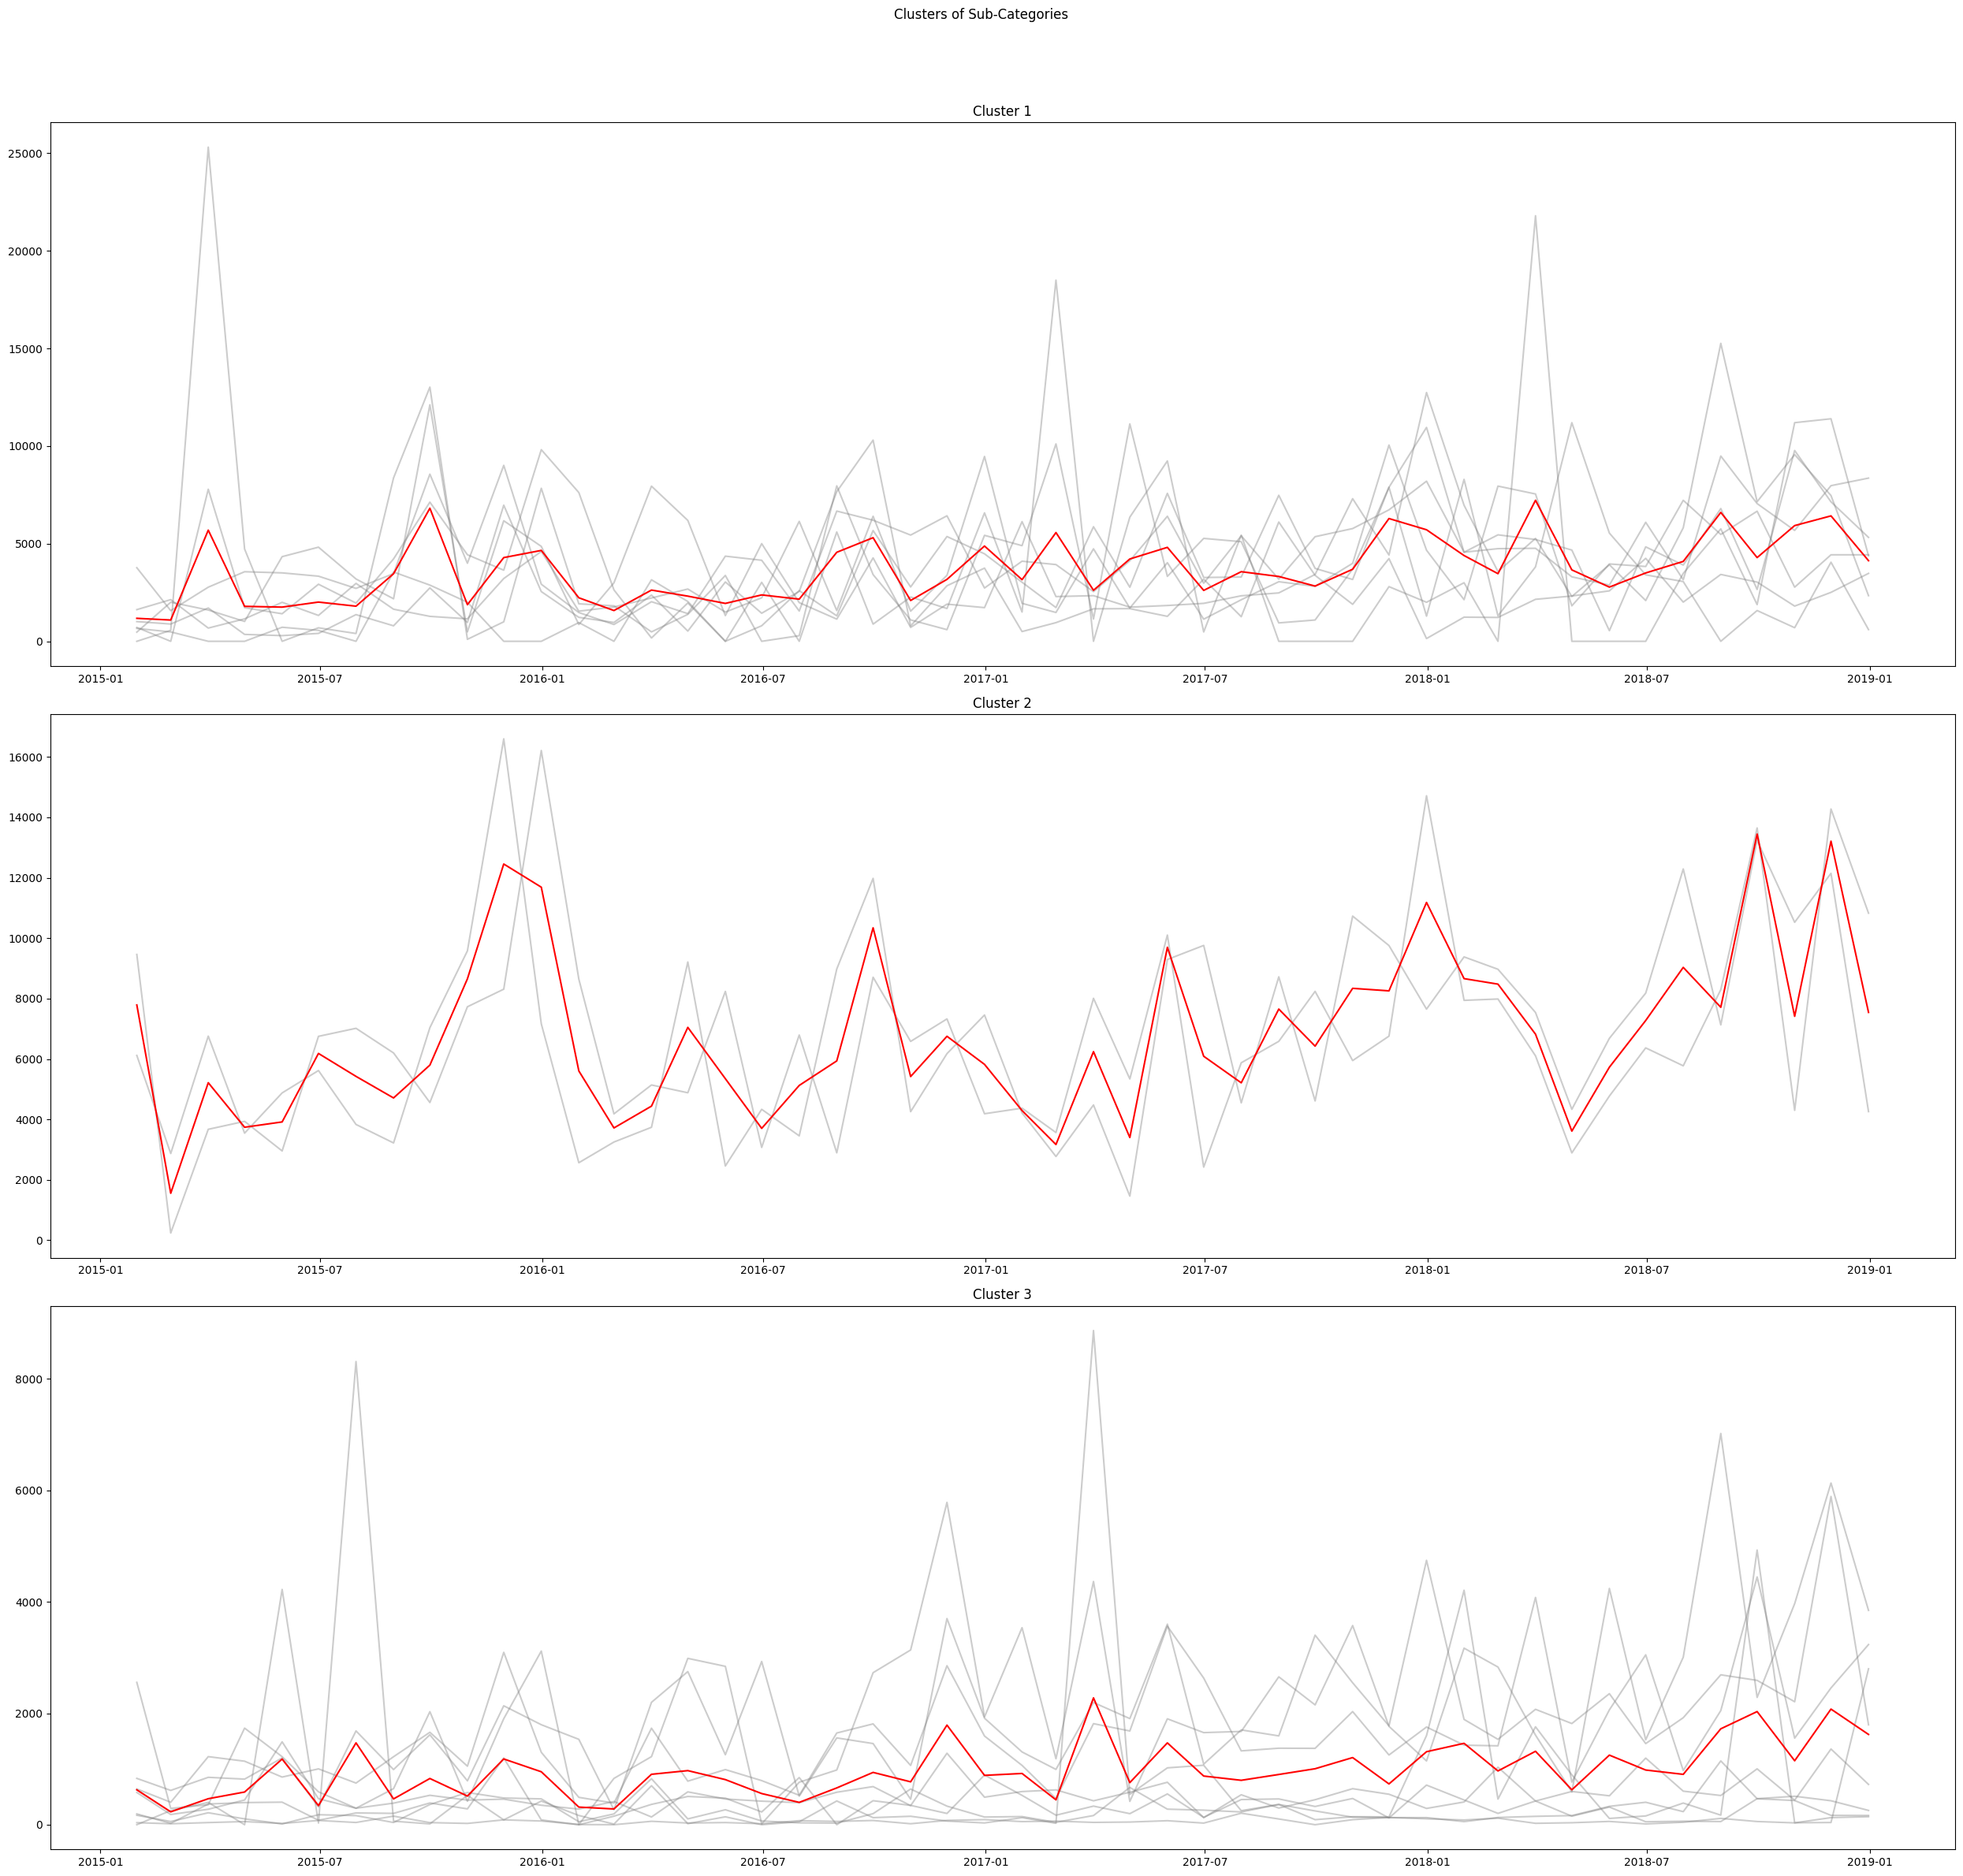

In [34]:
# Create subplots - one for each cluster
fig, axs = plt.subplots(cluster_count, 1, figsize=(25, 25))
fig.suptitle('Clusters of Sub-Categories')

# Ensure axs is always an array, even with a single cluster
if cluster_count == 1:
    axs = [axs]

# Plot each cluster
for cluster_idx in range(cluster_count):
    # Get the indices of the sub-categories belonging to the current cluster
    cluster_indices = np.where(labels == cluster_idx)[0]

    # Plot individual time series in gray
    for index in cluster_indices:
        axs[cluster_idx].plot(monthly_time_series.index, monthly_time_series.iloc[:, index], c="gray", alpha=0.4)   # for monthly_time_series, rows representing dates and columns representing sub-categories

    # Calculate the centroid for the cluster
    cluster_centroid_scaled = np.mean(scaled_data_subcat.iloc[cluster_indices, :], axis=0)  # scaled_data_subcat is the transposed dataframe

    # Inverse transform the centroid back to the original scale (as centroid was calculated on scaled data)
    cluster_centroid_original_scale = scaler.inverse_transform(cluster_centroid_scaled.values.reshape(1, -1))[0]

    # Plot the centroid in red
    axs[cluster_idx].plot(monthly_time_series.index, cluster_centroid_original_scale, c="red")

    # Set the title for the subplot
    axs[cluster_idx].set_title(f"Cluster {cluster_idx+1}")

# Adjust layout to prevent overlapping and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Analysis:** When K=3, cluster 2 contains only 2 time series which indicates that 3 clusters are not well-balanced. This can also be infered from dendrogram (ward linkage). At distance = 4, the dataset can be grouped into 3 clusters, with one cluster containing 6th and 13th sub-categories.

**Conclusion:** K=2 provides a better clustering result.

**3.** *Using hierarchical clustering method, cluster your data. Display dendogram.*


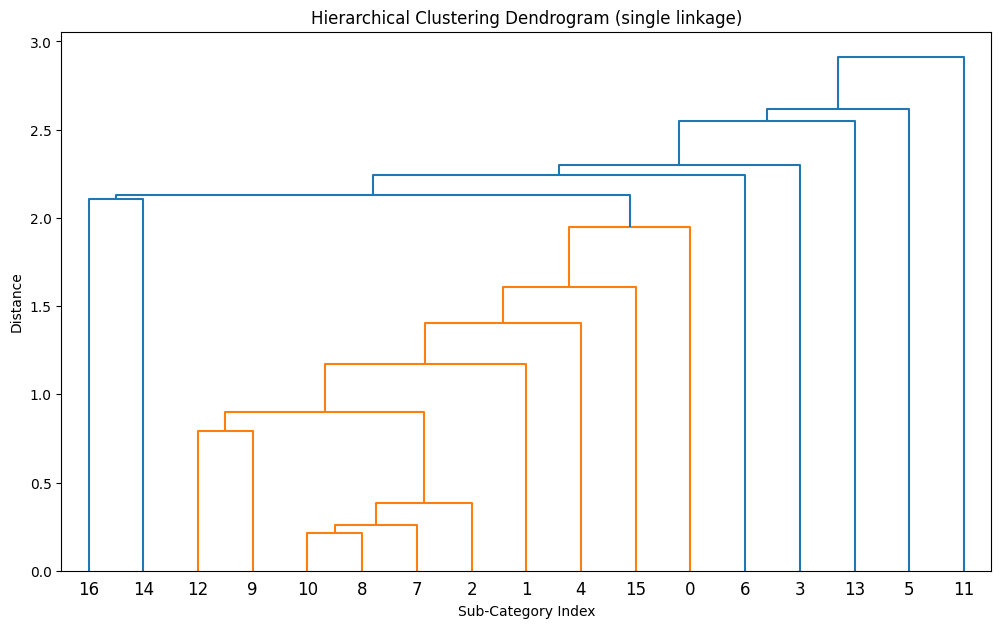

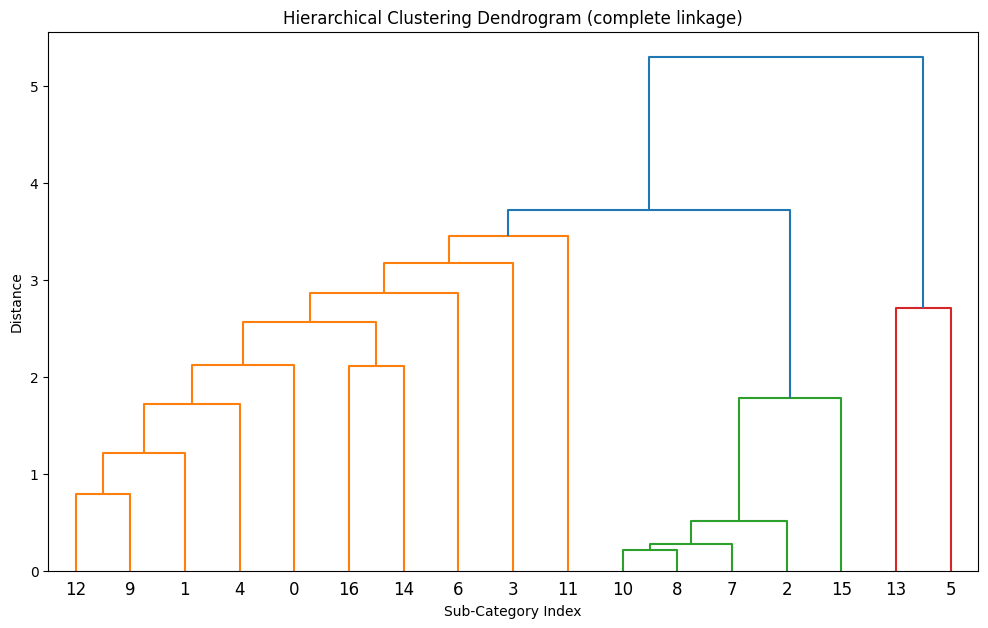

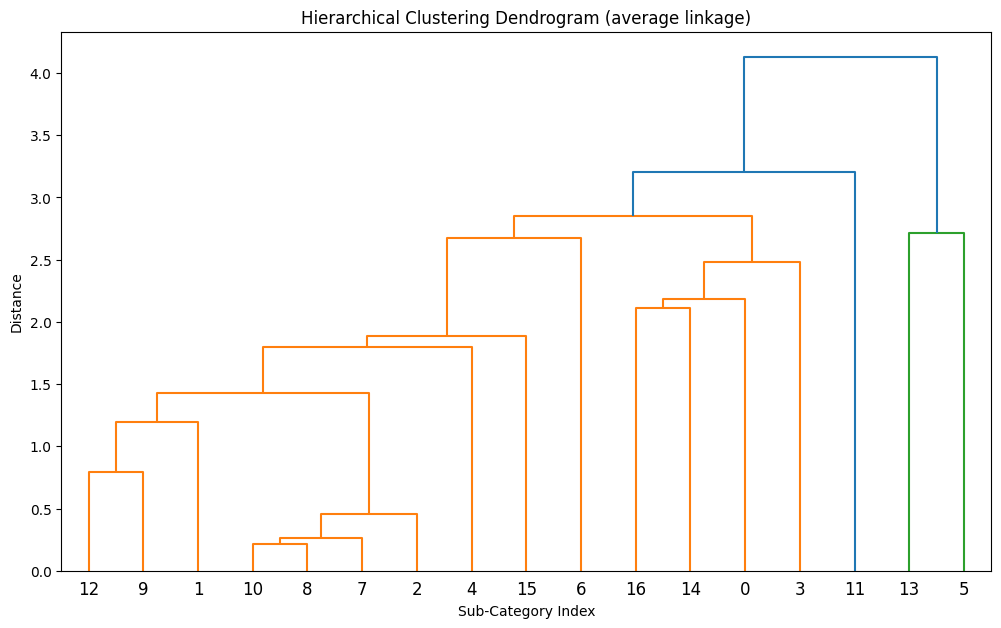

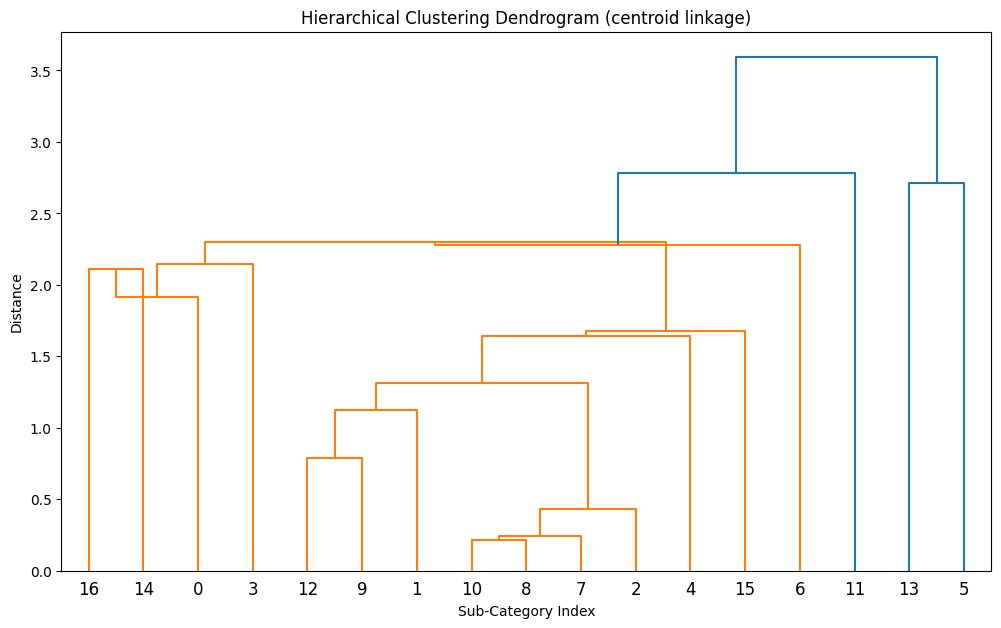

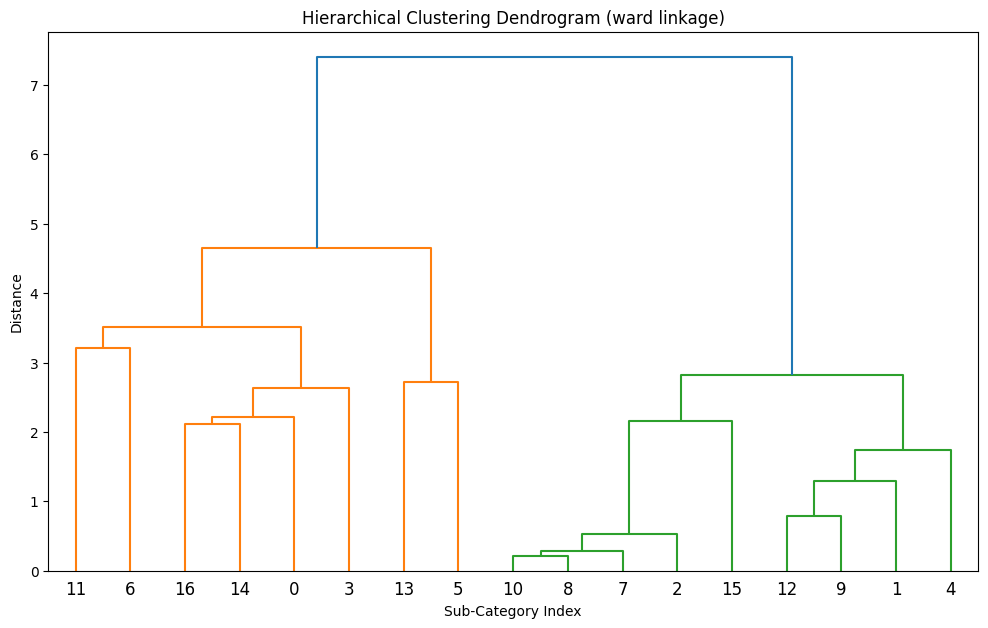

In [ ]:
# Different linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']

# Plot a dendrogram for each linkage method
for method in linkage_methods:
    linked = linkage(scaled_data_subcat, method=method)

    plt.figure(figsize=(12, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Sub-Category Index')
    plt.ylabel('Distance')
    plt.show()


**Analysis:** The ward linkage is the bset clusetring, which gives a more well-balanced clustering result. If looking at the distance =5, 2 clusters are suggested by ward linakege.

**References:**

https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering/notebook

https://www.kaggle.com/code/raskoshik/time-series-clustering-store-sales/notebook